In [ ]:
import pandas as pd
import matplotlib as plt

housing = pd.read_csv('/content/AmesHousing.csv')
housing.info()

In [ ]:
numerical = [
  'SalePrice', 'Lot Area', 'Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr'
]
categorical = [
  'MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold'
]

housing = housing[numerical + categorical]
housing.shape

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


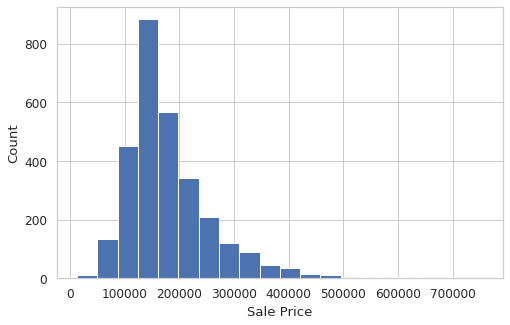

In [5]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

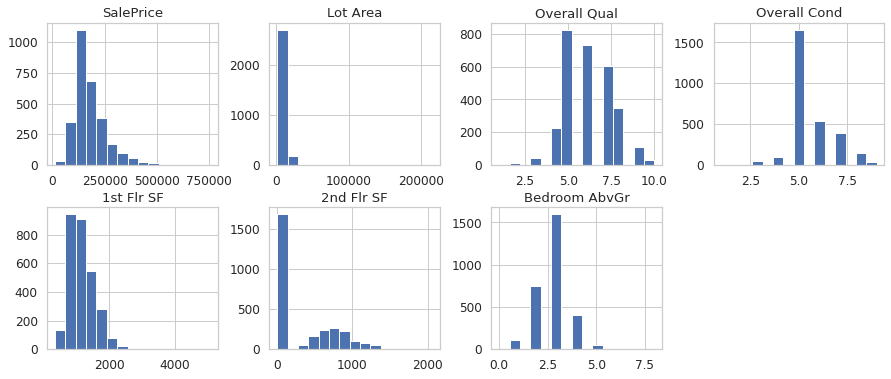

In [6]:
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


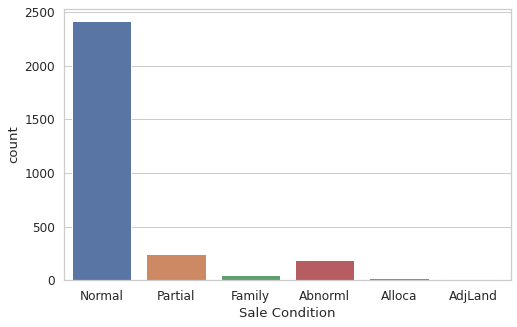

In [7]:
sns.countplot(housing['Sale Condition']);

In [8]:
housing[housing['Yr Sold'] == 2010].groupby('Mo Sold')['Yr Sold'].count()

Mo Sold
1    26
2    26
3    48
4    72
5    79
6    82
7     8
Name: Yr Sold, dtype: int64

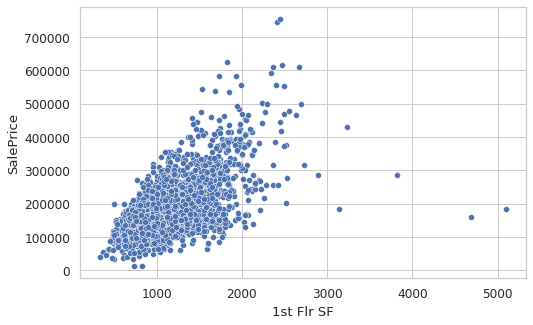

In [9]:
sns.scatterplot(x=housing['1st Flr SF'], y=housing['SalePrice']);

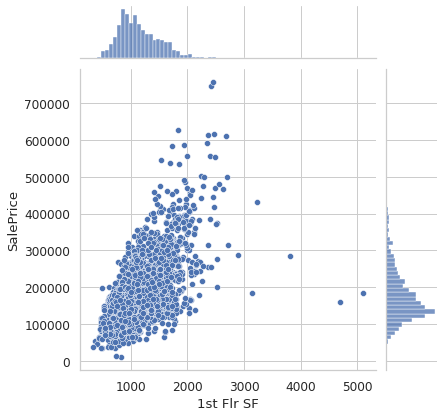

In [10]:
sns.jointplot(x=housing['1st Flr SF'], y=housing['SalePrice']);

In [ ]:
fig, ax = plt.pyplot.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

In [ ]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

In [ ]:
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', hue='Central Air', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Overall Qual', 'SalePrice');